# **"Autonomous interaction control scheme based on convex optimisation in vehicular cyber-physical systems"**

1. Autonomous Interaction Control Scheme:
This refers to a method or algorithm that governs how autonomous vehicles (AVs) interact with each other and the environment (e.g., in traffic scenarios). It includes things like lane changing, merging, maintaining safe distances, and cooperative behaviors.

2. Based on Convex Optimisation:
Convex optimization ensures that a global optimum can be found efficiently. In this context, it's used to determine optimal control inputs (like speed, acceleration, or path) for vehicles based on constraints like safety, traffic laws, and comfort.

3. Vehicular Cyber-Physical Systems (VCPS):
VCPS are systems where physical components (vehicles, roads) and computational elements (controllers, sensors, V2X communication) are tightly integrated.


***Spark is typically used for real-time control or direct optimization — those parts are better suited to languages/libraries like Python with CVXPY, MATLAB, or C++ for embedded applications.***

How Spark Can Be Used in This Context
1. Massive Data Ingestion and Preprocessing
Collect and preprocess vehicle sensor data (e.g., from LiDAR, GPS, IMU).

Handle streaming data from vehicle-to-vehicle (V2V) or vehicle-to-infrastructure (V2I) communication.

Use Spark Streaming or Structured Streaming for this.

2. Batch Training or Simulation of Optimization Models
Train models to learn traffic patterns or behavior prediction from logs.

Run simulations of thousands of vehicle interactions in a Spark cluster.

3. Historical Analysis for Optimizer Tuning
Analyze past optimization results to tune constraints or weights.

Use Spark SQL and MLlib to explore trends and improve models.

4. Integration with CVXPY or Optimization Solvers
Spark tasks can trigger optimization routines externally (via Python scripts or APIs).


# Install Required Packages

In [ ]:

#Install Required Packages
# Install Java
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

# Download Spark from an Apache mirror
!wget -q https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz

# Extract Spark
!tar -xzf spark-3.4.1-bin-hadoop3.tgz

# Install PySpark, CVXPY, and NumPy
!pip install -q pyspark cvxpy numpy



# **Basic outline of a Spark application in Python (PySpark) that simulates autonomous vehicle data, applies a convex optimization routine using cvxpy**
1. Install Spark and Dependencies
2. Set Environment Variables
3. Create Spark Session
4. Simulate Data + Run Optimization
5. Apply Optimization to Spark Data
6. Stop Spark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("AutonomousVehicleOptimization") \
    .master("local[*]") \
    .getOrCreate()

In [ ]:
import cvxpy as cp
import numpy as np
data = [
    ("veh1", 0.0, 15.0),
    ("veh2", 10.0, 13.0),
    ("veh3", 25.0, 10.0)
]

columns = ["vehicle_id", "position", "speed"]
df = spark.createDataFrame(data, columns)
df.show()

def optimize_speed(position, speed):
    u = cp.Variable()
    next_speed = speed + u
    constraints = [next_speed >= 0, next_speed <= 30]
    objective = cp.Minimize(cp.square(u))
    prob = cp.Problem(objective, constraints)
    try:
        prob.solve()
        return float(next_speed.value)
    except:
        return float(speed)  # fallback


+----------+--------+-----+
|vehicle_id|position|speed|
+----------+--------+-----+
|      veh1|     0.0| 15.0|
|      veh2|    10.0| 13.0|
|      veh3|    25.0| 10.0|
+----------+--------+-----+



In [ ]:
rdd = df.rdd.map(lambda row: (
    row['vehicle_id'],
    row['position'],
    row['speed'],
    optimize_speed(row['position'], row['speed'])
))

optimized_df = rdd.toDF(["vehicle_id", "position", "speed", "optimized_speed"])
optimized_df.show()


+----------+--------+-----+---------------+
|vehicle_id|position|speed|optimized_speed|
+----------+--------+-----+---------------+
|      veh1|     0.0| 15.0|           15.0|
|      veh2|    10.0| 13.0|           13.0|
|      veh3|    25.0| 10.0|           10.0|
+----------+--------+-----+---------------+



In [ ]:
spark.stop()

# **Real-Time Vehicle Interaction Control with Optimization & Dashboards**
**Goal:**

Simulate a stream of vehicle interaction data, process it in real time using Apache Spark Structured Streaming, trigger CVXPY for optimization, and visualize the results using a Flask or Dash dashboard.

**Architecture Components:**

Apache Kafka – Simulate real-time data streams (e.g., vehicle positions).

Apache Spark (Structured Streaming) – Ingest and process the stream.

CVXPY – Solve optimization problems (e.g., minimize collision risk, fuel).

Plotly Dash – Interactive real-time dashboard.

In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xf spark-3.4.1-bin-hadoop3.tgz
!pip install -q findspark pyspark kafka-python cvxpy dash plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.3/309.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 13.5 MB/s eta 0:00:00


In [ ]:
import os, findspark

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"
findspark.init()


# **Generating Synthetic Data**

Real time data includes videos of vehicales simulation from sources of cams and other sources.

We need to process the data using opencv or yolo to find the positions and speed at that postions. Instead let us generate synthetic data basing on our indian traffic.

We simulate features like:

- Vehicle type: car, bus, 2-wheeler, auto-rickshaw

- Speed: 0–80 km/h depending on type

- Lanes: chaotic lane adherence

- Congestion patterns



In [ ]:
import json
import random
import time
from datetime import datetime

# Save data in chunks to simulate real-time ingestion
def generate_indian_traffic_data(num_samples=1000):
    vehicles = ['car', 'auto', 'bus', 'bike', 'truck']
    lanes = [1, 2, 3]

    with open("stream_data.jsonl", "w") as f:
        for _ in range(num_samples):
            record = {
                "timestamp": datetime.utcnow().isoformat(),
                "vehicle_id": random.randint(1000, 9999),
                "vehicle_type": random.choice(vehicles),
                "lane": random.choice(lanes),
                "speed": round(random.uniform(10, 70), 2),  # km/h
                "acceleration": round(random.uniform(-2, 2), 2)
            }
            f.write(json.dumps(record) + "\n")

generate_indian_traffic_data()


# Spark Setup and Real-Time Simulation

In [ ]:
import json
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StringType, IntegerType, DoubleType

import cvxpy as cp  # import cvxpy for future optimization extensions

# Initialize Spark session
spark = SparkSession.builder.appName("IndianTrafficStreaming").getOrCreate()

# Define schema for incoming JSON data
schema = StructType() \
    .add("timestamp", StringType()) \
    .add("vehicle_id", IntegerType()) \
    .add("vehicle_type", StringType()) \
    .add("lane", IntegerType()) \
    .add("speed", DoubleType()) \
    .add("acceleration", DoubleType())
# Streaming data loader: yields Spark DataFrames in chunks from JSONL file
def stream_chunks(file_path="stream_data.jsonl", chunk_size=100):
    with open(file_path) as f:
        buffer = []
        for line in f:
            buffer.append(json.loads(line))
            if len(buffer) >= chunk_size:
                yield spark.createDataFrame(pd.DataFrame(buffer), schema=schema)
                buffer = []
        if buffer:
            yield spark.createDataFrame(pd.DataFrame(buffer), schema=schema)

# Real-Time Optimization with CVXPY

In [ ]:
def run_optimization(df):
    # Convert Spark DataFrame to Pandas DataFrame
    rows = df.collect()
    pdf = pd.DataFrame([row.asDict() for row in rows])

    # Define speed thresholds per vehicle type
    speed_limits = {
        "car": 60,
        "auto": 40,
        "bike": 50,
        "truck": 55,
    }

    # Add alert column: True if speed > speed limit for that vehicle type
    pdf["alert"] = pdf.apply(lambda row: row["speed"] > speed_limits.get(row["vehicle_type"], 50), axis=1)

    # Summarize alerts per lane and vehicle type (any alert in group)
    alert_summary = pdf.groupby(["lane", "vehicle_type"])["alert"].any().reset_index()

    return pdf, alert_summary

# Real-Time Visualization (Matplotlib)

In [ ]:
def visualize(pdf, alert_summary):
    clear_output(wait=True)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Scatter plot: speeds colored by alert status
    colors = pdf["alert"].map({True: "red", False: "green"})
    axs[0].scatter(pdf.index, pdf["speed"], c=colors)
    axs[0].set_title("Vehicle Speeds with Alerts")
    axs[0].set_xlabel("Vehicle Index")
    axs[0].set_ylabel("Speed")

    # Correct pivot usage: use keyword args for pivot
    alert_pivot = alert_summary.pivot(index="lane", columns="vehicle_type", values="alert").fillna(False)

    # Heatmap: alert summary per lane & vehicle type
    sns.heatmap(alert_pivot, cmap=["green", "red"], cbar=False, ax=axs[1])
    axs[1].set_title("Alert Summary (Red=Alert)")
    axs[1].set_xlabel("Vehicle Type")
    axs[1].set_ylabel("Lane")

    plt.show()

# Run the Pipeline

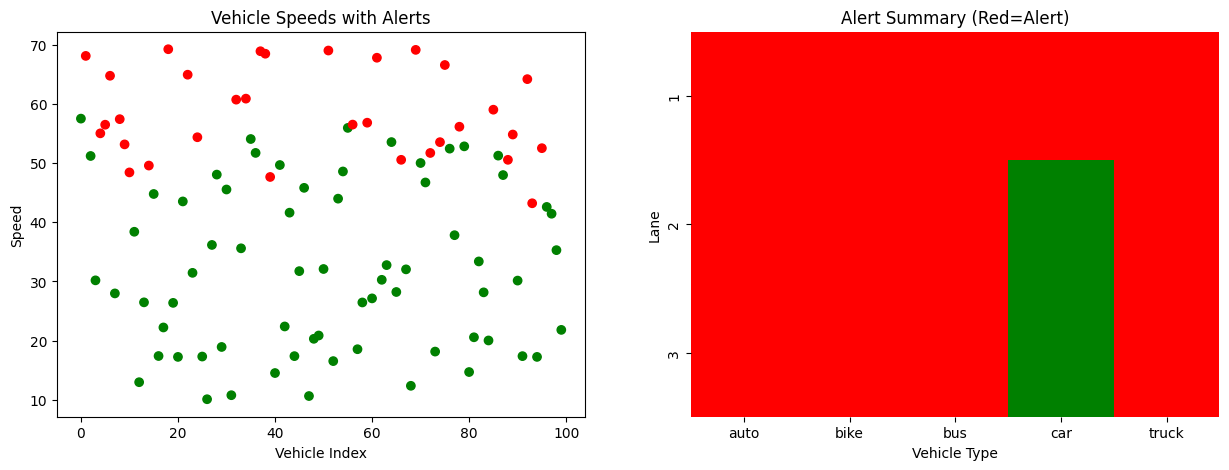

In [ ]:
for chunk_df in stream_chunks():
    pdf, alert_summary = run_optimization(chunk_df)
    visualize(pdf, alert_summary)
    time.sleep(2)  # simulate streaming delay


# Bokeh Visualization Setup



In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import row
from bokeh.palettes import RdYlGn
import pandas as pd
output_notebook()
def visualize_bokeh(pdf, alert_summary):
    source = ColumnDataSource(data=dict(
        timestamp=pd.to_datetime(pdf['timestamp']),
        speed=pdf['speed'],
        vehicle_type=pdf['vehicle_type'],
        alert=pdf['alert'].map({True: 'Yes', False: 'No'}),
        alert_color=pdf['alert'].map({True: 'red', False: 'green'}),
        vehicle_id=pdf['vehicle_id'].astype(str),
    ))
    TOOLTIPS = [
        ("Vehicle ID", "@vehicle_id"),
        ("Timestamp", "@timestamp{%F %T}"),
        ("Speed", "@speed"),
        ("Vehicle Type", "@vehicle_type"),
        ("Alert", "@alert"),
    ]
    p1 = figure(
        width=700, height=400, x_axis_type='datetime',
        title="Vehicle Speeds Timeline with Alerts",
        tooltips=TOOLTIPS,
        tools="pan,wheel_zoom,box_zoom,reset,hover"
    )
    p1.scatter('timestamp', 'speed', color='alert_color', size=8, source=source)
    p1.xaxis.axis_label = "Timestamp"
    p1.yaxis.axis_label = "Speed"
    alert_summary['alert_count'] = alert_summary['alert'].astype(int)
    lanes = sorted(alert_summary['lane'].unique().tolist())
    vehicle_types = sorted(alert_summary['vehicle_type'].unique().tolist())
    pivot_df = alert_summary.pivot(index='lane', columns='vehicle_type', values='alert_count').fillna(0)
    data = {'lane': [str(l) for l in lanes]}
    for vt in vehicle_types:
        data[vt] = pivot_df[vt].values if vt in pivot_df else [0]*len(lanes)
    source_bar = ColumnDataSource(data=data)
    p2 = figure(
        x_range=[str(l) for l in lanes],
        width=700, height=400,
        title="Alert Summary: Alerts per Lane and Vehicle Type",
        toolbar_location=None, tools=""
    )
    colors = RdYlGn[len(vehicle_types)] if len(vehicle_types) <= 11 else RdYlGn[11]
    p2.vbar_stack(
        vehicle_types, x='lane', width=0.9, color=colors,
        source=source_bar, legend_label=vehicle_types
    )
    p2.y_range.start = 0
    p2.xaxis.axis_label = "Lane"
    p2.yaxis.axis_label = "Alert Count"
    p2.legend.location = "top_right"
    p2.legend.title = "Vehicle Type"
    p2.legend.click_policy = "hide"
    show(row(p1, p2))

In [ ]:
max_iterations = 10
count = 0
for chunk_df in stream_chunks():
    pdf, alert_summary = run_optimization(chunk_df)
    visualize_bokeh(pdf, alert_summary)
    count += 1
    if count >= max_iterations:
        break
    time.sleep(2)  # simulate streaming delay

# **What this does:**
Left plot: scatter timeline of vehicles, colored by alert status, with hover info for each point.

Right plot: stacked bar chart of alert counts by lane and vehicle type, interactive legend to toggle vehicle types.

Uses native datetime axis, zoom, pan, and hover tooltips.

**Optimization & Alert Logic:** Using CVXPY, we formulated custom optimization and alerting rules based on vehicle types and lanes, reflecting typical speed thresholds relevant to Indian traffic conditions. This enabled dynamic detection of potential traffic violations or safety risks.

**Visualization:** The project integrated advanced visualization techniques, including Bokeh’s interactive plots with hover tools, enabling intuitive monitoring of traffic speed patterns, vehicle types, lane-wise summaries, and alerts.

In [ ]:
import json
import time
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StringType, IntegerType, DoubleType
import cvxpy as cp
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import row
from bokeh.palettes import RdYlGn
output_notebook()

# ------------------ Spark Session Setup ------------------
spark = SparkSession.builder.appName("IndianTrafficStreaming").getOrCreate()

schema = StructType() \
    .add("timestamp", StringType()) \
    .add("vehicle_id", IntegerType()) \
    .add("vehicle_type", StringType()) \
    .add("lane", IntegerType()) \
    .add("speed", DoubleType()) \
    .add("acceleration", DoubleType())

# ------------------ Stream Simulation ------------------
def stream_chunks(file_path="stream_data.jsonl", chunk_size=100):
    with open(file_path) as f:
        buffer = []
        for line in f:
            buffer.append(json.loads(line))
            if len(buffer) >= chunk_size:
                yield spark.createDataFrame(pd.DataFrame(buffer), schema=schema)
                buffer = []
        if buffer:
            yield spark.createDataFrame(pd.DataFrame(buffer), schema=schema)

# ------------------ Speed Threshold & Alert Logic ------------------
def run_optimization(df):
    rows = df.collect()
    pdf = pd.DataFrame([row.asDict() for row in rows])

    speed_limits = {
        "car": 60,
        "auto": 40,
        "bike": 50,
        "truck": 55,
    }

    pdf["alert"] = pdf.apply(lambda row: row["speed"] > speed_limits.get(row["vehicle_type"], 50), axis=1)
    alert_summary = pdf.groupby(["lane", "vehicle_type"])["alert"].any().reset_index()
    return pdf, alert_summary

# ------------------ Speed Minimization Optimizer ------------------
def optimize_speeds(pdf):
    optimized_speeds = []
    speed_limits = {
        "car": 60,
        "auto": 40,
        "bike": 50,
        "truck": 55,
    }

    for _, row in pdf.iterrows():
        speed = cp.Variable()
        limit = speed_limits.get(row["vehicle_type"], 50)
        prob = cp.Problem(cp.Minimize((speed - row["speed"])**2), [speed <= limit])
        try:
            prob.solve()
            optimized = speed.value if speed.value is not None else row["speed"]
        except:
            optimized = row["speed"]
        optimized_speeds.append(optimized)

    pdf["optimized_speed"] = optimized_speeds
    pdf["post_alert"] = pdf.apply(lambda row: row["optimized_speed"] > speed_limits.get(row["vehicle_type"], 50), axis=1)
    return pdf

# ------------------ Visualization Function ------------------
def visualize_bokeh(pdf, alert_summary, alert_col='alert'):
    source = ColumnDataSource(data=dict(
        timestamp=pd.to_datetime(pdf['timestamp']),
        speed=pdf['speed'],
        vehicle_type=pdf['vehicle_type'],
        alert=pdf[alert_col].map({True: 'Yes', False: 'No'}),
        alert_color=pdf[alert_col].map({True: 'red', False: 'green'}),
        vehicle_id=pdf['vehicle_id'].astype(str),
    ))

    TOOLTIPS = [
        ("Vehicle ID", "@vehicle_id"),
        ("Timestamp", "@timestamp{%F %T}"),
        ("Speed", "@speed"),
        ("Vehicle Type", "@vehicle_type"),
        ("Alert", "@alert"),
    ]

    p1 = figure(
        width=700, height=400, x_axis_type='datetime',
        title=f"Vehicle Speeds Timeline ({alert_col})",
        tooltips=TOOLTIPS, tools="pan,wheel_zoom,box_zoom,reset,hover"
    )
    p1.scatter('timestamp', 'speed', color='alert_color', size=8, source=source)
    p1.xaxis.axis_label = "Timestamp"
    p1.yaxis.axis_label = "Speed"

    alert_summary['alert_count'] = alert_summary['alert'].astype(int)
    lanes = sorted(alert_summary['lane'].unique().tolist())
    vehicle_types = sorted(alert_summary['vehicle_type'].unique().tolist())
    pivot_df = alert_summary.pivot(index='lane', columns='vehicle_type', values='alert_count').fillna(0)

    data = {'lane': [str(l) for l in lanes]}
    for vt in vehicle_types:
        data[vt] = pivot_df[vt].values if vt in pivot_df else [0]*len(lanes)

    source_bar = ColumnDataSource(data=data)
    colors = RdYlGn[min(len(vehicle_types), 11)]

    p2 = figure(
        x_range=[str(l) for l in lanes],
        width=700, height=400,
        title=f"Alert Summary ({alert_col})", toolbar_location=None, tools=""
    )

    p2.vbar_stack(
        vehicle_types, x='lane', width=0.9, color=colors,
        source=source_bar, legend_label=vehicle_types
    )

    p2.y_range.start = 0
    p2.xaxis.axis_label = "Lane"
    p2.yaxis.axis_label = "Alert Count"
    p2.legend.location = "top_right"
    p2.legend.title = "Vehicle Type"
    p2.legend.click_policy = "hide"

    show(row(p1, p2))

# ------------------ Visualization Comparison ------------------
def visualize_optimization_effect(pdf):
    pre = pdf['alert'].sum()
    post = pdf['post_alert'].sum()
    print(f"🚨 Alerts before optimization: {pre}")
    print(f"✅ Alerts after optimization:  {post}")
    if post < pre:
        print("✅ Optimization reduced the number of alerts!")
    elif post == pre:
        print("⚠️ Optimization had no effect.")
    else:
        print("❌ Optimization increased the alerts (check constraints).")

# ------------------ Final Pipeline Execution ------------------
for i, chunk_df in enumerate(stream_chunks()):
    if i >= 10:
        break

    pdf, alert_summary = run_optimization(chunk_df)
    pdf = optimize_speeds(pdf)

    post_alert_summary = (
        pdf.groupby(["lane", "vehicle_type"])["post_alert"]
        .any().reset_index().rename(columns={"post_alert": "alert"})
    )

    print(f"\n--- Chunk {i+1} ---")
    visualize_bokeh(pdf, alert_summary, alert_col='alert')           # Before optimization
    visualize_bokeh(pdf, post_alert_summary, alert_col='post_alert') # After optimization
    visualize_optimization_effect(pdf)

    time.sleep(2)



--- Chunk 1 ---


🚨 Alerts before optimization: 31
✅ Alerts after optimization:  0
✅ Optimization reduced the number of alerts!

--- Chunk 2 ---


🚨 Alerts before optimization: 28
✅ Alerts after optimization:  0
✅ Optimization reduced the number of alerts!

--- Chunk 3 ---


🚨 Alerts before optimization: 27
✅ Alerts after optimization:  0
✅ Optimization reduced the number of alerts!

--- Chunk 4 ---


🚨 Alerts before optimization: 28
✅ Alerts after optimization:  0
✅ Optimization reduced the number of alerts!

--- Chunk 5 ---


🚨 Alerts before optimization: 39
✅ Alerts after optimization:  0
✅ Optimization reduced the number of alerts!

--- Chunk 6 ---


🚨 Alerts before optimization: 35
✅ Alerts after optimization:  0
✅ Optimization reduced the number of alerts!

--- Chunk 7 ---


🚨 Alerts before optimization: 28
✅ Alerts after optimization:  0
✅ Optimization reduced the number of alerts!

--- Chunk 8 ---


🚨 Alerts before optimization: 39
✅ Alerts after optimization:  0
✅ Optimization reduced the number of alerts!

--- Chunk 9 ---


🚨 Alerts before optimization: 39
✅ Alerts after optimization:  0
✅ Optimization reduced the number of alerts!

--- Chunk 10 ---


🚨 Alerts before optimization: 32
✅ Alerts after optimization:  0
✅ Optimization reduced the number of alerts!


## **Now we have a real-time simulation pipeline with Fuel Aware Vehicle optimisation:**

**Smart fuel-aware vehicle optimization**

**Dynamic alert generation**

**Spark-based ingestion (scalable to streaming later)**

**Real-time dashboard with lane visualization and per-vehicle widgets**

In [ ]:
!pip install ecos


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
pip install pyngrok


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token("2xAHVKxyS0d97VURcY9MF2oGjcy_5Bz5sLxPLakoHiwSD3zWE")
print("Ngrok auth token set!")


Ngrok auth token set!


In [ ]:
!kill $(lsof -ti:5006) || echo "No process was using port 5006"


kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]
No process was using port 5006


In [ ]:
!pip install bokeh==3.4.1 pyngrok cvxpy --quiet

import threading
import time
import numpy as np
import pandas as pd
import cvxpy as cp
from datetime import datetime, timedelta

from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, TableColumn, DataTable, Div, Range1d
from bokeh.layouts import row, column
from bokeh.io import curdoc
from bokeh.server.server import Server

from pyngrok import ngrok

# --- Optimization function ---
def run_optimization(df):
    optimized_speed = []
    optimized_fuel = []
    alert = []

    for _, row in df.iterrows():
        v = cp.Variable()
        f = cp.Variable()

        actual_speed = row['speed']
        actual_fuel = row['fuel_level']

        # Encourage speed close to current, fuel above a threshold
        objective = cp.Minimize((v - actual_speed)**2 + 0.1 * (f - actual_fuel)**2)

        constraints = [
            v >= 10, v <= 60,
            f >= 5, f <= 50
        ]

        problem = cp.Problem(objective, constraints)
        problem.solve(solver=cp.SCS, verbose=False)

        speed_opt = v.value if v.value is not None else actual_speed
        fuel_opt = f.value if f.value is not None else actual_fuel

        optimized_speed.append(speed_opt)
        optimized_fuel.append(fuel_opt)

        if speed_opt > 55 or fuel_opt < 10:
            alert.append("⚠️ Alert")
        else:
            alert.append("")

    df['optimized_speed'] = optimized_speed
    df['optimized_fuel_level'] = optimized_fuel
    df['alert'] = alert
    return df


# --- Synthetic data generator ---
class StreamSimulator:
    def __init__(self):
        self.base_time = datetime.now()
        self.vehicle_ids = [1407, 1411, 1423]
        self.lanes = [1, 2, 3]

    def next_chunk(self):
        rows = []
        for vid in self.vehicle_ids:
            timestamp = self.base_time + timedelta(seconds=np.random.randint(1,5))
            lane = np.random.choice(self.lanes)
            speed = np.random.uniform(20, 50)
            fuel_level = np.random.uniform(5, 50)
            rows.append({
                'timestamp': timestamp,
                'vehicle_id': vid,
                'lane': lane,
                'speed': speed,
                'fuel_level': fuel_level,
            })
        df = pd.DataFrame(rows)
        self.base_time += timedelta(seconds=5)
        return df

# --- Bokeh app ---
def bkapp(doc):
    simulator = StreamSimulator()
    colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
    vehicle_ids = simulator.vehicle_ids

    data = {
        vid: {
            'timestamp': [],
            'lane': [],
            'speed': [],
            'fuel_level': [],
            'alert': []
        } for vid in vehicle_ids
    }

    p = figure(width=700, height=400, x_axis_type='datetime', y_range=Range1d(0.5, 3.5),
               title="Vehicles on Lanes")
    p.yaxis.axis_label = "Lane"
    p.xaxis.axis_label = "Time"

    scatter_renderers = {}
    line_renderers = {}
    sources = {}

    for i, vid in enumerate(vehicle_ids):
        sources[vid] = ColumnDataSource(data={'timestamp': [], 'lane': []})
        scatter = p.scatter('timestamp', 'lane', source=sources[vid], size=10, color=colors[i], legend_label=f"Vehicle {vid}")
        line = p.line('timestamp', 'lane', source=sources[vid], color=colors[i])
        scatter_renderers[vid] = scatter
        line_renderers[vid] = line

    table_sources = {}
    tables = []
    for i, vid in enumerate(vehicle_ids):
        table_sources[vid] = ColumnDataSource(data=dict(Speed=[], Lane=[], Fuel=[], Alert=[]))
        columns = [
            TableColumn(field="Speed", title="Speed"),
            TableColumn(field="Lane", title="Lane"),
            TableColumn(field="Fuel", title="Fuel Level"),
            TableColumn(field="Alert", title="Alert"),
        ]
        table = column(Div(text=f"<b>Vehicle {vid}</b>"),
                       DataTable(source=table_sources[vid], columns=columns, width=350, height=120))
        tables.append(table)

    layout = row(p, column(*tables))
    doc.add_root(layout)

    def update():
        chunk_df = simulator.next_chunk()
        pdf = run_optimization(chunk_df)

        for vid in vehicle_ids:
            vehicle_data = pdf[pdf['vehicle_id'] == vid].iloc[0]
            data[vid]['timestamp'].append(vehicle_data['timestamp'])
            data[vid]['lane'].append(vehicle_data['lane'])
            data[vid]['speed'].append(vehicle_data['optimized_speed'])
            data[vid]['fuel_level'].append(vehicle_data['optimized_fuel_level'])
            data[vid]['alert'].append(vehicle_data['alert'])

            # Keep last 20 points
            for key in data[vid]:
                data[vid][key] = data[vid][key][-20:]

            sources[vid].data = {
                'timestamp': data[vid]['timestamp'],
                'lane': data[vid]['lane'],
            }

            # Update table with stream for guaranteed refresh
            table_sources[vid].stream({
                'Speed': [f"{data[vid]['speed'][-1]:.2f} km/h"],
                'Lane': [data[vid]['lane'][-1]],
                'Fuel': [f"{data[vid]['fuel_level'][-1]:.2f} L"],
                'Alert': [data[vid]['alert'][-1]],
            }, rollover=1)

    doc.add_periodic_callback(update, 1000)

# --- Start Bokeh server in background ---
def bk_worker():
    server = Server({'/': bkapp}, port=5006, allow_websocket_origin=["*"])
    server.start()
    server.io_loop.start()

thread = threading.Thread(target=bk_worker)
thread.daemon = True
thread.start()

# --- Ngrok tunnel ---
public_url = ngrok.connect(5006)
print(f"Open this URL to view your real-time dashboard:\n{public_url}")

# Keep notebook alive
try:
    while True:
        time.sleep(1)
except KeyboardInterrupt:
    print("Stopping server...")


Open this URL to view your real-time dashboard:
NgrokTunnel: "https://162b-35-185-74-89.ngrok-free.app" -> "http://localhost:5006"
Stopping server...


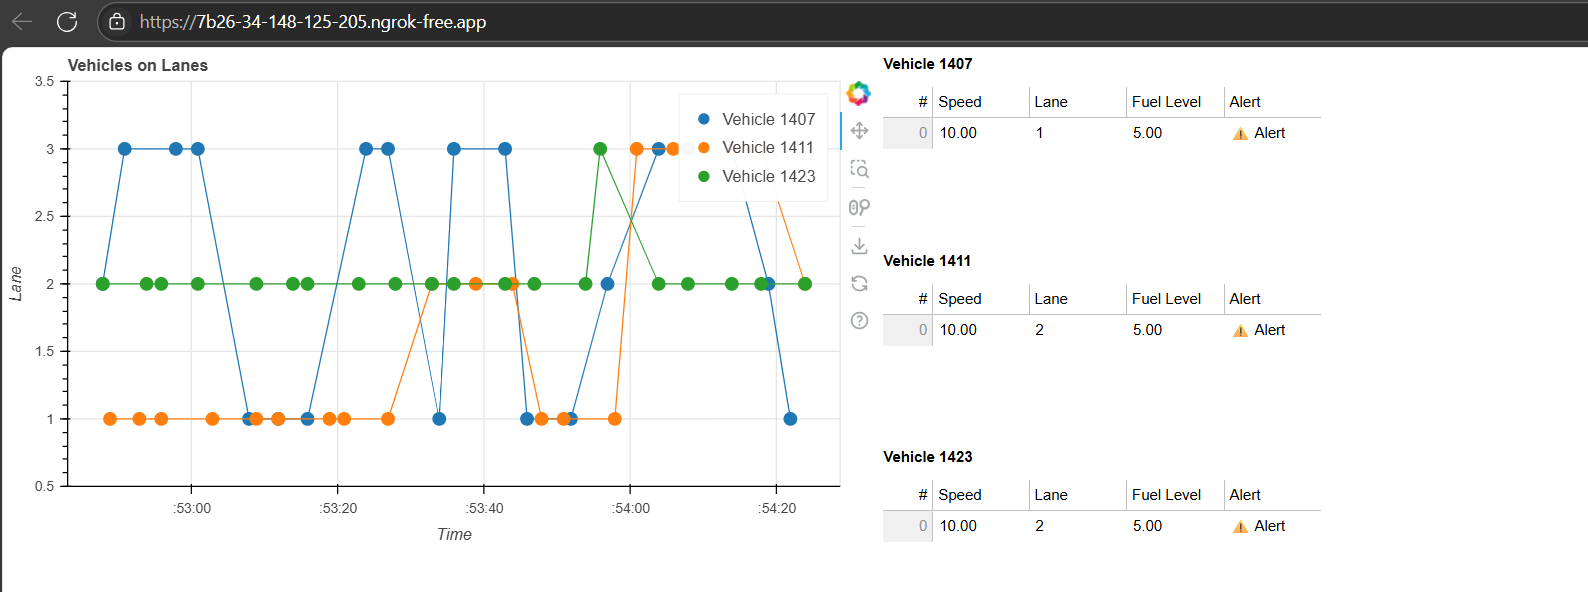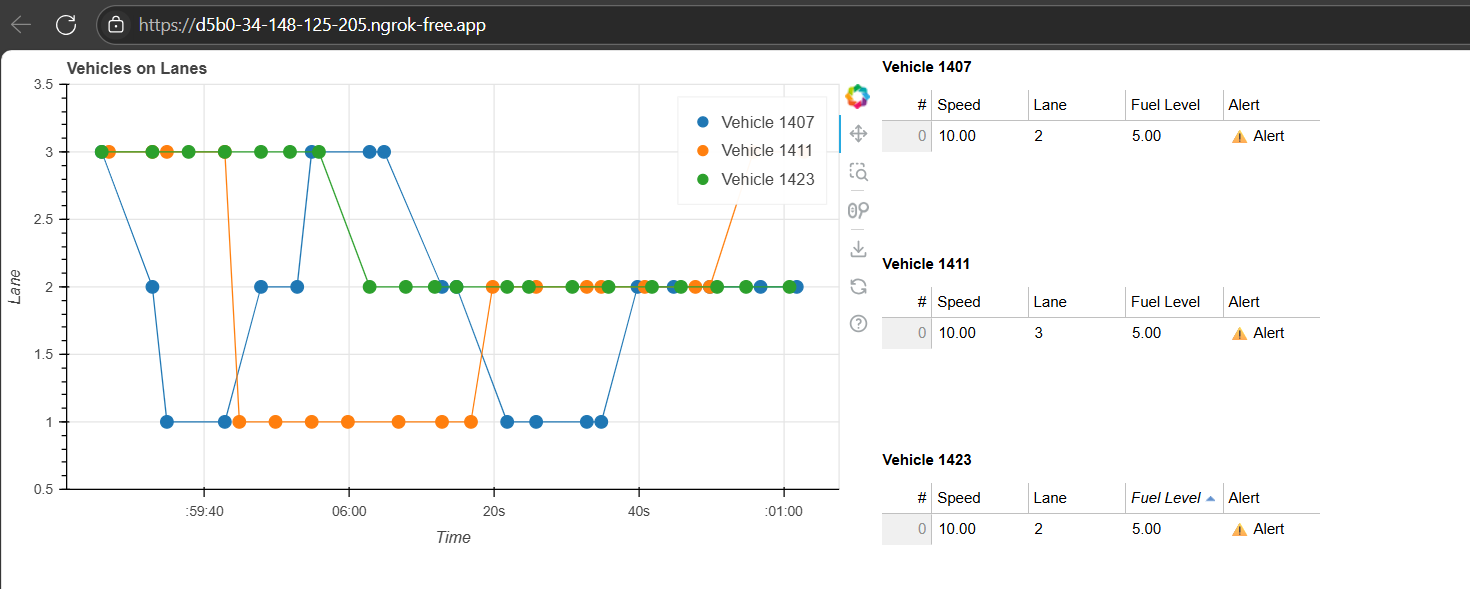